<a href="https://colab.research.google.com/github/Jeet1309/SOC_mrophix/blob/main/preojecting_image_on_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os

# Suppress all output temporarily
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        self._original_stderr = sys.stderr
        sys.stdout = open(os.devnull, 'w')
        sys.stderr = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stderr.close()
        sys.stdout = self._original_stdout
        sys.stderr = self._original_stderr

In [ ]:
# Install essentials
with HiddenPrints():

  !pip install ftfy regex tqdm
  !pip install git+https://github.com/openai/CLIP.git
  !pip install torch torchvision

  # Clone StyleGAN2-ADA PyTorch (Official NVIDIA repo)
  !git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

# Download pretrained StyleGAN2 model (FFHQ example)
!mkdir models

/content/stylegan2-ada-pytorch


In [ ]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl -P models


--2025-06-25 19:41:56--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 216.137.39.20, 216.137.39.99, 216.137.39.37, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|216.137.39.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘models/ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   237MB/s    in 1.5s    

2025-06-25 19:41:59 (237 MB/s) - ‘models/ffhq.pkl’ saved [381624121/381624121]



In [ ]:
!pip install legacy dnnlib

ERROR: Could not find a version that satisfies the requirement dnnlib (from versions: none)
ERROR: No matching distribution found for dnnlib


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import clip
from PIL import Image
import torchvision.transforms as transforms

In [ ]:
import torch
import legacy
import dnnlib

import torchvision.transforms.functional as TF


In [ ]:
device = 'cuda'

# Load generator
network_path = 'models/ffhq.pkl'
with open(network_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
with HiddenPrints():
  # Function to sample latent and generate image
  def generate_image(z):
      ws = G.mapping(z, None)
      img = G.synthesis(ws)
      return img

  # Generate a random image
  ws = torch.randn(1,18, G.z_dim).to(device)
  img = G.synthesis(ws)

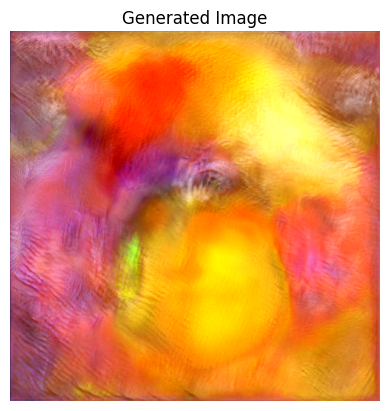

In [ ]:

img_display = (img.clamp(-1, 1) + 1) / 2
img_pil = TF.to_pil_image(img_display.squeeze(0).cpu())
img_pil.show()
plt.imshow(img_pil)
plt.axis('off')
plt.title('Generated Image')
plt.show()

In [ ]:
generated_shape = img.shape  # [1, 3, H, W]
_, c, H, W = generated_shape
c,H,W

(3, 1024, 1024)

Saving ffhq_trail.png to ffhq_trail.png


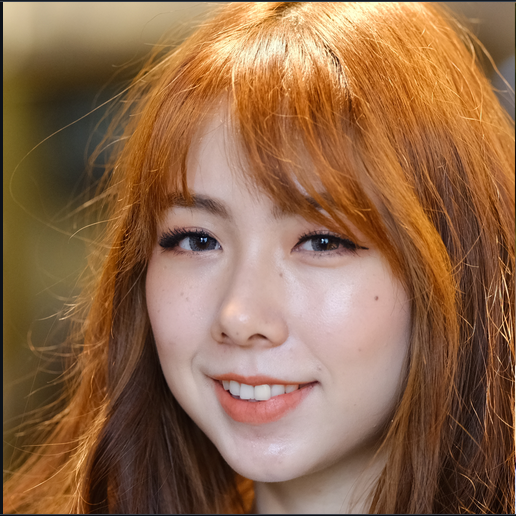

In [ ]:
from google.colab import files
from PIL import Image
from IPython.display import display

# Upload the file
uploaded = files.upload()

# Load and show the image
for filename in uploaded.keys():
    image = Image.open(filename)
    display(image)


In [ ]:
input_image = Image.open('/content/stylegan2-ada-pytorch/ffhq_trail.png').convert('RGB')  # Replace with actual filename
resized_image = input_image.resize((W, H))

# Show resized image

# resized_image.show()

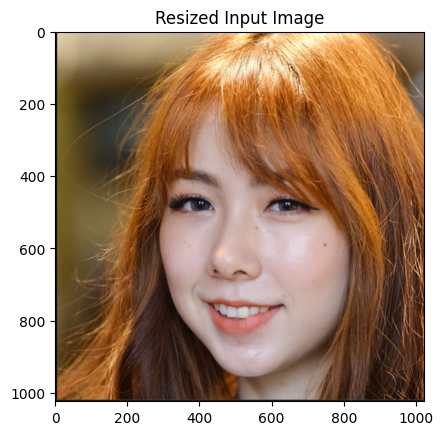

In [ ]:
# Normalize for display like GAN output: (0,1) range
resized_display = transforms.ToTensor()(resized_image)

# Convert to PIL image (though it's already one)
resized_pil = TF.to_pil_image(resized_display)

# Show using PIL
resized_pil.show()

# Show using matplotlib
import matplotlib.pyplot as plt

plt.imshow(resized_pil)
# plt.axis('off')
plt.title('Resized Input Image')
plt.show()

In [ ]:


# Convert both images to tensors
to_tensor = transforms.ToTensor()

gen_tensor = to_tensor(img_pil).view(-1)            # Generated image (flattened)
input_tensor = to_tensor(resized_image).view(-1)     # Input image (flattened)

# Ensure both tensors are on the same device
gen_tensor = gen_tensor.to(device)
input_tensor = input_tensor.to(device)

# Compute Euclidean distance
euclidean_distance = torch.norm(gen_tensor - input_tensor, p=2)

print(f'📏 Euclidean Distance: {euclidean_distance.item():.4f}')

📏 Euclidean Distance: 588.7250


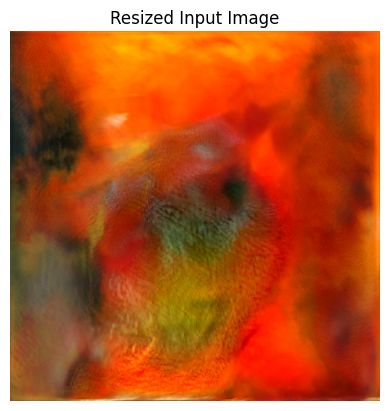

In [ ]:
ws = torch.randn(1,18, G.z_dim).to(device)
with HiddenPrints():
  genrated = G.synthesis(ws)
gen_display = (genrated.clamp(-1, 1) + 1) / 2
gen_pil = TF.to_pil_image(gen_display.squeeze(0).cpu())
gen_pil.show()
plt.imshow(gen_pil)
plt.axis('off')
plt.title('Resized Input Image')
plt.show()

/tmp/ipython-input-25-670147408.py:25: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Optimizing ws with AMP + Euclidean Loss:   0%|          | 1/5000 [00:00<53:13,  1.57it/s]

Step 0000 | Euclidean Loss: 3105.192383


Optimizing ws with AMP + Euclidean Loss:   2%|▏         | 102/5000 [00:16<12:20,  6.61it/s]

Step 0100 | Euclidean Loss: 340.467529


Optimizing ws with AMP + Euclidean Loss:   4%|▍         | 202/5000 [00:31<11:53,  6.72it/s]

Step 0200 | Euclidean Loss: 289.603851


Optimizing ws with AMP + Euclidean Loss:   6%|▌         | 302/5000 [00:46<11:48,  6.63it/s]

Step 0300 | Euclidean Loss: 272.001312


Optimizing ws with AMP + Euclidean Loss:   8%|▊         | 402/5000 [01:02<13:04,  5.86it/s]

Step 0400 | Euclidean Loss: 257.554657


Optimizing ws with AMP + Euclidean Loss:  10%|█         | 502/5000 [01:18<11:23,  6.58it/s]

Step 0500 | Euclidean Loss: 299.598267


Optimizing ws with AMP + Euclidean Loss:  12%|█▏        | 602/5000 [01:33<11:27,  6.39it/s]

Step 0600 | Euclidean Loss: 238.645493


Optimizing ws with AMP + Euclidean Loss:  14%|█▍        | 702/5000 [01:49<11:07,  6.44it/s]

Step 0700 | Euclidean Loss: 227.783081


Optimizing ws with AMP + Euclidean Loss:  16%|█▌        | 802/5000 [02:04<10:48,  6.47it/s]

Step 0800 | Euclidean Loss: 221.476929


Optimizing ws with AMP + Euclidean Loss:  18%|█▊        | 902/5000 [02:20<10:22,  6.58it/s]

Step 0900 | Euclidean Loss: 221.790543


Optimizing ws with AMP + Euclidean Loss:  20%|██        | 1002/5000 [02:35<10:08,  6.57it/s]

Step 1000 | Euclidean Loss: 213.151276


Optimizing ws with AMP + Euclidean Loss:  22%|██▏       | 1102/5000 [02:51<10:42,  6.07it/s]

Step 1100 | Euclidean Loss: 225.542984


Optimizing ws with AMP + Euclidean Loss:  24%|██▍       | 1202/5000 [03:06<09:46,  6.48it/s]

Step 1200 | Euclidean Loss: 216.582947


Optimizing ws with AMP + Euclidean Loss:  26%|██▌       | 1302/5000 [03:22<09:34,  6.43it/s]

Step 1300 | Euclidean Loss: 209.761978


Optimizing ws with AMP + Euclidean Loss:  28%|██▊       | 1402/5000 [03:37<09:08,  6.57it/s]

Step 1400 | Euclidean Loss: 226.331360


Optimizing ws with AMP + Euclidean Loss:  30%|███       | 1502/5000 [03:53<09:15,  6.29it/s]

Step 1500 | Euclidean Loss: 211.206589


Optimizing ws with AMP + Euclidean Loss:  32%|███▏      | 1602/5000 [04:09<08:42,  6.50it/s]

Step 1600 | Euclidean Loss: 209.535385


Optimizing ws with AMP + Euclidean Loss:  34%|███▍      | 1702/5000 [04:24<08:24,  6.54it/s]

Step 1700 | Euclidean Loss: 207.492676


Optimizing ws with AMP + Euclidean Loss:  36%|███▌      | 1802/5000 [04:40<08:42,  6.11it/s]

Step 1800 | Euclidean Loss: 218.981674


Optimizing ws with AMP + Euclidean Loss:  38%|███▊      | 1902/5000 [04:55<07:49,  6.60it/s]

Step 1900 | Euclidean Loss: 215.145004


Optimizing ws with AMP + Euclidean Loss:  40%|████      | 2002/5000 [05:11<07:39,  6.53it/s]

Step 2000 | Euclidean Loss: 204.733337


Optimizing ws with AMP + Euclidean Loss:  42%|████▏     | 2102/5000 [05:26<07:21,  6.56it/s]

Step 2100 | Euclidean Loss: 204.918045


Optimizing ws with AMP + Euclidean Loss:  44%|████▍     | 2202/5000 [05:42<08:01,  5.81it/s]

Step 2200 | Euclidean Loss: 201.352066


Optimizing ws with AMP + Euclidean Loss:  46%|████▌     | 2302/5000 [05:57<06:59,  6.44it/s]

Step 2300 | Euclidean Loss: 193.617874


Optimizing ws with AMP + Euclidean Loss:  48%|████▊     | 2402/5000 [06:13<06:41,  6.48it/s]

Step 2400 | Euclidean Loss: 198.826309


Optimizing ws with AMP + Euclidean Loss:  50%|█████     | 2502/5000 [06:28<06:21,  6.56it/s]

Step 2500 | Euclidean Loss: 194.961700


Optimizing ws with AMP + Euclidean Loss:  52%|█████▏    | 2602/5000 [06:44<06:12,  6.43it/s]

Step 2600 | Euclidean Loss: 200.502258


Optimizing ws with AMP + Euclidean Loss:  54%|█████▍    | 2702/5000 [07:00<05:51,  6.54it/s]

Step 2700 | Euclidean Loss: 202.248016


Optimizing ws with AMP + Euclidean Loss:  56%|█████▌    | 2802/5000 [07:15<05:35,  6.55it/s]

Step 2800 | Euclidean Loss: 200.581604


Optimizing ws with AMP + Euclidean Loss:  58%|█████▊    | 2902/5000 [07:31<05:47,  6.04it/s]

Step 2900 | Euclidean Loss: 189.861938


Optimizing ws with AMP + Euclidean Loss:  60%|██████    | 3002/5000 [07:46<05:02,  6.60it/s]

Step 3000 | Euclidean Loss: 200.639755


Optimizing ws with AMP + Euclidean Loss:  62%|██████▏   | 3102/5000 [08:02<04:55,  6.43it/s]

Step 3100 | Euclidean Loss: 189.638382


Optimizing ws with AMP + Euclidean Loss:  64%|██████▍   | 3202/5000 [08:17<04:34,  6.56it/s]

Step 3200 | Euclidean Loss: 191.058670


Optimizing ws with AMP + Euclidean Loss:  66%|██████▌   | 3302/5000 [08:33<04:21,  6.48it/s]

Step 3300 | Euclidean Loss: 189.975632


Optimizing ws with AMP + Euclidean Loss:  68%|██████▊   | 3402/5000 [08:48<04:06,  6.49it/s]

Step 3400 | Euclidean Loss: 188.474060


Optimizing ws with AMP + Euclidean Loss:  70%|███████   | 3502/5000 [09:04<03:46,  6.61it/s]

Step 3500 | Euclidean Loss: 188.965958


Optimizing ws with AMP + Euclidean Loss:  72%|███████▏  | 3602/5000 [09:20<03:50,  6.06it/s]

Step 3600 | Euclidean Loss: 192.035294


Optimizing ws with AMP + Euclidean Loss:  74%|███████▍  | 3702/5000 [09:35<03:18,  6.53it/s]

Step 3700 | Euclidean Loss: 195.973618


Optimizing ws with AMP + Euclidean Loss:  76%|███████▌  | 3802/5000 [09:51<03:04,  6.49it/s]

Step 3800 | Euclidean Loss: 189.455185


Optimizing ws with AMP + Euclidean Loss:  78%|███████▊  | 3902/5000 [10:06<02:51,  6.41it/s]

Step 3900 | Euclidean Loss: 186.804840


Optimizing ws with AMP + Euclidean Loss:  80%|████████  | 4002/5000 [10:22<02:33,  6.51it/s]

Step 4000 | Euclidean Loss: 203.322021


Optimizing ws with AMP + Euclidean Loss:  82%|████████▏ | 4102/5000 [10:37<02:18,  6.48it/s]

Step 4100 | Euclidean Loss: 188.210892


Optimizing ws with AMP + Euclidean Loss:  84%|████████▍ | 4202/5000 [10:53<02:02,  6.51it/s]

Step 4200 | Euclidean Loss: 186.851593


Optimizing ws with AMP + Euclidean Loss:  86%|████████▌ | 4302/5000 [11:08<01:54,  6.09it/s]

Step 4300 | Euclidean Loss: 189.626862


Optimizing ws with AMP + Euclidean Loss:  88%|████████▊ | 4402/5000 [11:24<01:31,  6.52it/s]

Step 4400 | Euclidean Loss: 184.935440


Optimizing ws with AMP + Euclidean Loss:  90%|█████████ | 4502/5000 [11:39<01:15,  6.56it/s]

Step 4500 | Euclidean Loss: 187.953140


Optimizing ws with AMP + Euclidean Loss:  92%|█████████▏| 4602/5000 [11:55<01:00,  6.54it/s]

Step 4600 | Euclidean Loss: 190.643036


Optimizing ws with AMP + Euclidean Loss:  94%|█████████▍| 4702/5000 [12:10<00:46,  6.40it/s]

Step 4700 | Euclidean Loss: 185.564865


Optimizing ws with AMP + Euclidean Loss:  96%|█████████▌| 4802/5000 [12:26<00:30,  6.59it/s]

Step 4800 | Euclidean Loss: 185.488281


Optimizing ws with AMP + Euclidean Loss:  98%|█████████▊| 4902/5000 [12:41<00:14,  6.53it/s]

Step 4900 | Euclidean Loss: 196.312149


Optimizing ws with AMP + Euclidean Loss: 100%|██████████| 5000/5000 [12:56<00:00,  6.44it/s]

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py", line 1380, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py", line 1823, in _jit_compile
    return _import_m

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py", line 1380, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py", line 1823, in _jit_compile
    return _import_mo

Failed!


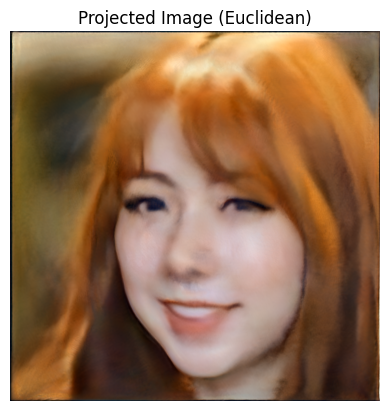

In [ ]:
import torch
from torch.cuda.amp import autocast, GradScaler
from tqdm import trange
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# --- Load and preprocess target image ---
# Replace with your image path or object
resized_image = Image.open("/content/stylegan2-ada-pytorch/ffhq_trail.png").convert("RGB").resize((1024,1024))
preprocess = transforms.Compose([
    transforms.ToTensor(),             # [0, 1]
    transforms.Normalize([0.5]*3, [0.5]*3)  # → [-1, 1]
])
target_tensor = preprocess(resized_image).unsqueeze(0).to(device)  # Shape: [1, 3, 256, 256]

# --- Reinitialize latent ws ---
ws = torch.randn(1, 18, G.z_dim, device=device, requires_grad=True)

# --- Optimizer ---
optimizer = torch.optim.Adam([ws], lr=0.1, betas=(0.85, 0.99))

# --- AMP GradScaler ---
scaler = GradScaler()

# --- Optimization loop with AMP + Euclidean (L2) Loss ---
for step in trange(5000, desc="Optimizing ws with AMP + Euclidean Loss"):
    optimizer.zero_grad()
    with HiddenPrints():
      with autocast():
          with torch.cuda.amp.autocast(enabled=False):  # Ensure precision stability for StyleGAN
              generated = G.synthesis(ws)

          loss = torch.norm(generated - target_tensor, p=2)

      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

    # Print loss every 100 steps
    if step % 100 == 0:
        print(f"Step {step:04d} | Euclidean Loss: {loss.item():.6f}")

# --- Show final projected image ---
with torch.no_grad():
    final_img = G.synthesis(ws)
    final_img_display = (final_img.clamp(-1, 1) + 1) / 2  # [-1, 1] → [0, 1]
    final_pil = TF.to_pil_image(final_img_display.squeeze(0).cpu())

final_pil.show()

plt.imshow(final_pil)
plt.axis('off')
plt.title('Projected Image (Euclidean)')
plt.show()


In [ ]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.7 MB/s eta 0:00:00


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipython-input-36-2831897307.py:37: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth


Stage 1: Optimize at 256x256:   0%|          | 2/5000 [00:00<15:13,  5.47it/s]

Step 0000 | L2: 499.0247 


Stage 1: Optimize at 256x256:  10%|█         | 502/5000 [01:19<11:27,  6.54it/s]

Step 0500 | L2: 65.8143 


Stage 1: Optimize at 256x256:  20%|██        | 1002/5000 [02:36<10:11,  6.53it/s]

Step 1000 | L2: 54.2836 


Stage 1: Optimize at 256x256:  30%|███       | 1502/5000 [03:53<09:23,  6.21it/s]

Step 1500 | L2: 50.6248 


Stage 1: Optimize at 256x256:  40%|████      | 2002/5000 [05:10<07:33,  6.62it/s]

Step 2000 | L2: 49.7013 


Stage 1: Optimize at 256x256:  50%|█████     | 2502/5000 [06:27<06:19,  6.59it/s]

Step 2500 | L2: 47.8971 


Stage 1: Optimize at 256x256:  60%|██████    | 3002/5000 [07:44<05:34,  5.97it/s]

Step 3000 | L2: 49.9257 


Stage 1: Optimize at 256x256:  70%|███████   | 3502/5000 [09:01<03:48,  6.56it/s]

Step 3500 | L2: 45.0690 


Stage 1: Optimize at 256x256:  80%|████████  | 4002/5000 [10:18<02:31,  6.60it/s]

Step 4000 | L2: 46.0148 


Stage 1: Optimize at 256x256:  90%|█████████ | 4502/5000 [11:35<01:16,  6.51it/s]

Step 4500 | L2: 45.8135 


Stage 1: Optimize at 256x256: 100%|██████████| 5000/5000 [12:52<00:00,  6.47it/s]


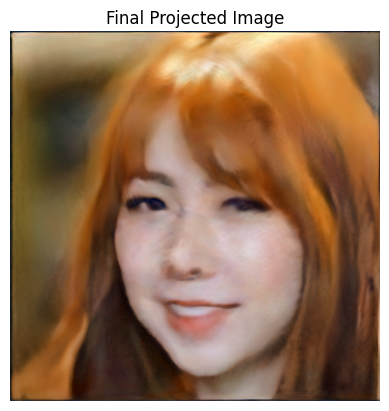

In [ ]:
import torch
from torch.cuda.amp import autocast, GradScaler
from tqdm import trange
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
import lpips  # pip install lpips

# --- Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load generator ---
# G = your_loaded_generator_model
# G = G.eval().to(device)

# --- Load and preprocess target image ---
img_path = "/content/stylegan2-ada-pytorch/ffhq_trail.png"
target_image = Image.open(img_path).convert("RGB").resize((1024, 1024))

preprocess = transforms.Compose([
    transforms.ToTensor(),                         # [0, 1]
    transforms.Normalize([0.5]*3, [0.5]*3)          # → [-1, 1]
])
target_tensor = preprocess(target_image).unsqueeze(0).to(device)      # [1, 3, 1024, 1024]
target_tensor_low = F.interpolate(target_tensor, size=(256, 256), mode='bilinear', align_corners=False)

# --- LPIPS perceptual loss model ---
lpips_fn = lpips.LPIPS(net='vgg').to(device)

# --- Initialize latent (StyleGAN2 uses 18 w-vectors of z_dim) ---
ws = torch.randn(1, 18, G.z_dim, device=device, requires_grad=True)

# --- Optimizer + AMP ---
optimizer = torch.optim.Adam([ws], lr=0.1, betas=(0.7, 0.99))
scaler = GradScaler()

# --- Stage 1: Low-resolution optimization ---
for step in trange(5000, desc="Stage 1: Optimize at 256x256"):
    optimizer.zero_grad()
    with HiddenPrints():
      with autocast():
          with torch.cuda.amp.autocast(enabled=False):
              generated = G.synthesis(ws)
              generated_low = F.interpolate(generated, size=(256, 256), mode='bilinear', align_corners=False)

          l2_loss = loss = torch.norm(generated_low - target_tensor_low, p=2)
          # perceptual_loss = lpips_fn(generated_low, target_tensor_low).mean()
          loss = l2_loss #+ 0.2 * perceptual_loss

      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

    if step % 500 == 0:
        print(f"Step {step:04d} | L2: {l2_loss.item():.4f} ")
with torch.no_grad():
  with HiddenPrints():
      final_img = G.synthesis(ws)
      final_img_display = (final_img.clamp(-1, 1) + 1) / 2  # → [0, 1]
      final_pil = TF.to_pil_image(final_img_display.squeeze(0).cpu())

final_pil.show()

plt.imshow(final_pil)
plt.axis('off')
plt.title('Final Projected Image')
plt.show()
# --- Stage 2: High-resolution refinement ---


/tmp/ipython-input-43-2246306078.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Stage 2: Refine at 1024x1024:   0%|          | 2/5000 [00:00<14:10,  5.88it/s]

[High-Res] Step 0000 | L2: 586.1908


Stage 2: Refine at 1024x1024:   4%|▍         | 202/5000 [00:31<12:19,  6.48it/s]

[High-Res] Step 0200 | L2: 205.3797


Stage 2: Refine at 1024x1024:   8%|▊         | 402/5000 [01:03<11:30,  6.66it/s]

[High-Res] Step 0400 | L2: 159.6656


Stage 2: Refine at 1024x1024:  12%|█▏        | 602/5000 [01:33<11:02,  6.64it/s]

[High-Res] Step 0600 | L2: 146.3580


Stage 2: Refine at 1024x1024:  16%|█▌        | 802/5000 [02:04<10:40,  6.55it/s]

[High-Res] Step 0800 | L2: 137.3717


Stage 2: Refine at 1024x1024:  20%|██        | 1002/5000 [02:35<10:49,  6.16it/s]

[High-Res] Step 1000 | L2: 138.6712


Stage 2: Refine at 1024x1024:  24%|██▍       | 1202/5000 [03:06<09:31,  6.65it/s]

[High-Res] Step 1200 | L2: 128.2971


Stage 2: Refine at 1024x1024:  28%|██▊       | 1402/5000 [03:37<09:52,  6.07it/s]

[High-Res] Step 1400 | L2: 118.0700


Stage 2: Refine at 1024x1024:  32%|███▏      | 1602/5000 [04:08<08:33,  6.62it/s]

[High-Res] Step 1600 | L2: 117.2531


Stage 2: Refine at 1024x1024:  36%|███▌      | 1802/5000 [04:38<08:06,  6.57it/s]

[High-Res] Step 1800 | L2: 118.4501


Stage 2: Refine at 1024x1024:  40%|████      | 2002/5000 [05:09<07:37,  6.55it/s]

[High-Res] Step 2000 | L2: 114.1844


Stage 2: Refine at 1024x1024:  44%|████▍     | 2202/5000 [05:40<07:04,  6.59it/s]

[High-Res] Step 2200 | L2: 108.6486


Stage 2: Refine at 1024x1024:  48%|████▊     | 2402/5000 [06:11<06:33,  6.61it/s]

[High-Res] Step 2400 | L2: 115.2565


Stage 2: Refine at 1024x1024:  52%|█████▏    | 2602/5000 [06:42<06:05,  6.57it/s]

[High-Res] Step 2600 | L2: 108.0390


Stage 2: Refine at 1024x1024:  56%|█████▌    | 2802/5000 [07:12<05:54,  6.20it/s]

[High-Res] Step 2800 | L2: 109.3684


Stage 2: Refine at 1024x1024:  60%|██████    | 3002/5000 [07:43<05:02,  6.59it/s]

[High-Res] Step 3000 | L2: 108.5338


Stage 2: Refine at 1024x1024:  64%|██████▍   | 3202/5000 [08:14<05:01,  5.96it/s]

[High-Res] Step 3200 | L2: 106.1153


Stage 2: Refine at 1024x1024:  68%|██████▊   | 3402/5000 [08:45<04:02,  6.60it/s]

[High-Res] Step 3400 | L2: 109.2217


Stage 2: Refine at 1024x1024:  72%|███████▏  | 3602/5000 [09:16<03:34,  6.52it/s]

[High-Res] Step 3600 | L2: 107.4405


Stage 2: Refine at 1024x1024:  76%|███████▌  | 3802/5000 [09:47<03:01,  6.62it/s]

[High-Res] Step 3800 | L2: 107.3662


Stage 2: Refine at 1024x1024:  80%|████████  | 4002/5000 [10:17<02:31,  6.57it/s]

[High-Res] Step 4000 | L2: 102.6419


Stage 2: Refine at 1024x1024:  84%|████████▍ | 4202/5000 [10:48<02:02,  6.52it/s]

[High-Res] Step 4200 | L2: 102.2572


Stage 2: Refine at 1024x1024:  88%|████████▊ | 4402/5000 [11:19<01:31,  6.57it/s]

[High-Res] Step 4400 | L2: 102.2017


Stage 2: Refine at 1024x1024:  92%|█████████▏| 4602/5000 [11:50<01:04,  6.14it/s]

[High-Res] Step 4600 | L2: 100.8095


Stage 2: Refine at 1024x1024:  96%|█████████▌| 4802/5000 [12:21<00:29,  6.63it/s]

[High-Res] Step 4800 | L2: 101.1205


Stage 2: Refine at 1024x1024: 100%|██████████| 5000/5000 [12:52<00:00,  6.48it/s]


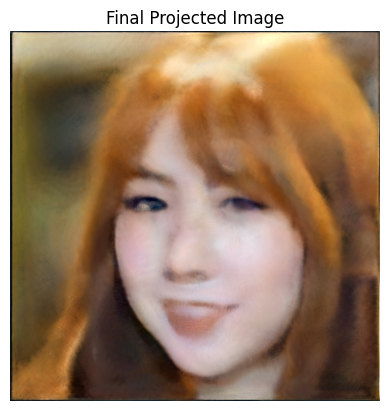

In [ ]:
ws = torch.randn(1, 18, G.z_dim, device=device, requires_grad=True)
optimizer = torch.optim.Adam([ws], lr=0.1, betas=(0.7, 0.99))
scaler = GradScaler()
target_tensor_mid  = F.interpolate(target_tensor, size=(512, 512), mode='bilinear', align_corners=False)
for step in trange(5000, desc="Stage 2: Refine at 1024x1024"):
    optimizer.zero_grad()
    with HiddenPrints():
      with autocast():
          with torch.cuda.amp.autocast(enabled=False):
              generated = G.synthesis(ws)
              generated_mid = F.interpolate(generated, size=(512, 512), mode='bilinear', align_corners=False)
          l2_loss = loss = torch.norm(generated_mid - target_tensor_mid, p=2)
          loss = l2_loss  # More weight to perceptual in hi-res

      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

    if step % 200 == 0:
        print(f"[High-Res] Step {step:04d} | L2: {l2_loss.item():.4f}")

# --- Final image ---
with torch.no_grad():
  with HiddenPrints():
      final_img = G.synthesis(ws)
      final_img_display = (final_img.clamp(-1, 1) + 1) / 2  # → [0, 1]
      final_pil = TF.to_pil_image(final_img_display.squeeze(0).cpu())

final_pil.show()

plt.imshow(final_pil)
plt.axis('off')
plt.title('Final Projected Image')
plt.show()


/tmp/ipython-input-44-1021783829.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Stage 2: Refine at 1024x1024:   0%|          | 2/5000 [00:00<12:59,  6.41it/s]

[High-Res] Step 0000 | L2: 1274.3014


Stage 2: Refine at 1024x1024:   4%|▍         | 202/5000 [00:31<12:07,  6.60it/s]

[High-Res] Step 0200 | L2: 327.5813


Stage 2: Refine at 1024x1024:   8%|▊         | 402/5000 [01:02<11:42,  6.55it/s]

[High-Res] Step 0400 | L2: 286.2267


Stage 2: Refine at 1024x1024:  12%|█▏        | 602/5000 [01:33<11:10,  6.56it/s]

[High-Res] Step 0600 | L2: 273.6623


Stage 2: Refine at 1024x1024:  16%|█▌        | 802/5000 [02:04<10:41,  6.54it/s]

[High-Res] Step 0800 | L2: 244.8217


Stage 2: Refine at 1024x1024:  20%|██        | 1002/5000 [02:35<11:00,  6.05it/s]

[High-Res] Step 1000 | L2: 250.3982


Stage 2: Refine at 1024x1024:  24%|██▍       | 1202/5000 [03:06<09:37,  6.57it/s]

[High-Res] Step 1200 | L2: 253.3428


Stage 2: Refine at 1024x1024:  28%|██▊       | 1402/5000 [03:37<09:28,  6.33it/s]

[High-Res] Step 1400 | L2: 248.0460


Stage 2: Refine at 1024x1024:  32%|███▏      | 1602/5000 [04:08<08:40,  6.53it/s]

[High-Res] Step 1600 | L2: 224.5043


Stage 2: Refine at 1024x1024:  36%|███▌      | 1802/5000 [04:39<08:08,  6.54it/s]

[High-Res] Step 1800 | L2: 266.9002


Stage 2: Refine at 1024x1024:  40%|████      | 2002/5000 [05:09<07:44,  6.45it/s]

[High-Res] Step 2000 | L2: 220.2313


Stage 2: Refine at 1024x1024:  44%|████▍     | 2202/5000 [05:40<07:09,  6.51it/s]

[High-Res] Step 2200 | L2: 216.6229


Stage 2: Refine at 1024x1024:  48%|████▊     | 2402/5000 [06:11<07:02,  6.15it/s]

[High-Res] Step 2400 | L2: 221.4639


Stage 2: Refine at 1024x1024:  52%|█████▏    | 2602/5000 [06:42<06:03,  6.60it/s]

[High-Res] Step 2600 | L2: 217.8346


Stage 2: Refine at 1024x1024:  56%|█████▌    | 2802/5000 [07:13<06:03,  6.04it/s]

[High-Res] Step 2800 | L2: 215.0140


Stage 2: Refine at 1024x1024:  60%|██████    | 3002/5000 [07:44<05:05,  6.54it/s]

[High-Res] Step 3000 | L2: 218.4733


Stage 2: Refine at 1024x1024:  64%|██████▍   | 3202/5000 [08:15<04:33,  6.57it/s]

[High-Res] Step 3200 | L2: 215.7053


Stage 2: Refine at 1024x1024:  68%|██████▊   | 3402/5000 [08:46<04:01,  6.61it/s]

[High-Res] Step 3400 | L2: 209.7974


Stage 2: Refine at 1024x1024:  72%|███████▏  | 3602/5000 [09:17<03:33,  6.56it/s]

[High-Res] Step 3600 | L2: 199.4478


Stage 2: Refine at 1024x1024:  76%|███████▌  | 3802/5000 [09:48<03:03,  6.52it/s]

[High-Res] Step 3800 | L2: 208.5888


Stage 2: Refine at 1024x1024:  80%|████████  | 4002/5000 [10:19<02:32,  6.56it/s]

[High-Res] Step 4000 | L2: 213.7243


Stage 2: Refine at 1024x1024:  84%|████████▍ | 4202/5000 [10:50<02:14,  5.94it/s]

[High-Res] Step 4200 | L2: 219.7715


Stage 2: Refine at 1024x1024:  88%|████████▊ | 4402/5000 [11:21<01:31,  6.54it/s]

[High-Res] Step 4400 | L2: 204.0474


Stage 2: Refine at 1024x1024:  92%|█████████▏| 4602/5000 [11:52<01:00,  6.55it/s]

[High-Res] Step 4600 | L2: 215.9822


Stage 2: Refine at 1024x1024:  96%|█████████▌| 4802/5000 [12:23<00:30,  6.58it/s]

[High-Res] Step 4800 | L2: 214.1811


Stage 2: Refine at 1024x1024: 100%|██████████| 5000/5000 [12:53<00:00,  6.46it/s]


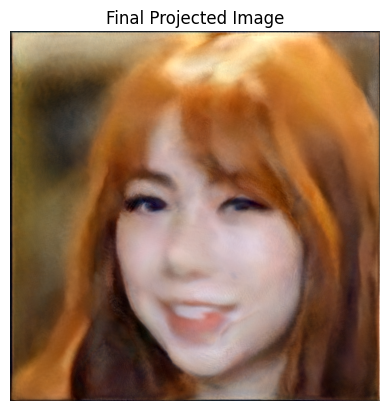

In [ ]:
ws = torch.randn(1, 18, G.z_dim, device=device, requires_grad=True)
optimizer = torch.optim.Adam([ws], lr=0.1, betas=(0.7, 0.99))
scaler = GradScaler()

for step in trange(5000, desc="Stage 2: Refine at 1024x1024"):
    optimizer.zero_grad()
    with HiddenPrints():
      with autocast():
          with torch.cuda.amp.autocast(enabled=False):
              generated = G.synthesis(ws)

          l2_loss = loss = torch.norm(generated - target_tensor, p=2)
          loss = l2_loss  # More weight to perceptual in hi-res

      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

    if step % 200 == 0:
        print(f"[High-Res] Step {step:04d} | L2: {l2_loss.item():.4f}")

# --- Final image ---
with torch.no_grad():
  with HiddenPrints():
      final_img = G.synthesis(ws)
      final_img_display = (final_img.clamp(-1, 1) + 1) / 2  # → [0, 1]
      final_pil = TF.to_pil_image(final_img_display.squeeze(0).cpu())

final_pil.show()

plt.imshow(final_pil)
plt.axis('off')
plt.title('Final Projected Image')
plt.show()

In [ ]:

target_tensor_low_low = F.interpolate(target_tensor, size=(64,64), mode='bilinear', align_corners=False)



# --- Initialize latent (StyleGAN2 uses 18 w-vectors of z_dim) ---
ws = torch.randn(1, 18, G.z_dim, device=device, requires_grad=True)

# --- Optimizer + AMP ---
optimizer = torch.optim.Adam([ws], lr=0.1, betas=(0.7, 0.99))
scaler = GradScaler()

# --- Stage 1: Low-resolution optimization ---
for step in trange(5000, desc="Stage 1: Optimize at 256x256"):
    optimizer.zero_grad()
    with HiddenPrints():
      with autocast():
          with torch.cuda.amp.autocast(enabled=False):
              generated = G.synthesis(ws)
              generated_low_low= F.interpolate(generated, size=(64,64), mode='bilinear', align_corners=False)

          l2_loss = loss = torch.norm(generated_low_low - target_tensor_low_low, p=2)
          # perceptual_loss = lpips_fn(generated_low, target_tensor_low).mean()
          loss = l2_loss #+ 0.2 * perceptual_loss

      scaler.scale(loss).backward()
      scaler.step(optimizer)
      scaler.update()

    if step % 500 == 0:
        print(f"Step {step:04d} | L2: {l2_loss.item():.4f} ")
with torch.no_grad():
  with HiddenPrints():
      final_img = G.synthesis(ws)
      final_img_display = (final_img.clamp(-1, 1) + 1) / 2  # → [0, 1]
      final_pil = TF.to_pil_image(final_img_display.squeeze(0).cpu())

final_pil.show()

plt.imshow(final_pil)
plt.axis('off')
plt.title('Final Projected Image')
plt.show()

/tmp/ipython-input-45-3124617077.py:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Stage 1: Optimize at 256x256:   0%|          | 2/5000 [00:00<14:03,  5.93it/s]

Step 0000 | L2: 134.4748 


Stage 1: Optimize at 256x256:  10%|█         | 502/5000 [01:17<11:57,  6.26it/s]

Step 0500 | L2: 14.6897 


Stage 1: Optimize at 256x256:  20%|██        | 1002/5000 [02:34<09:57,  6.69it/s]

Step 1000 | L2: 14.2464 


Stage 1: Optimize at 256x256:  30%|███       | 1502/5000 [03:50<08:44,  6.67it/s]

Step 1500 | L2: 13.0904 


Stage 1: Optimize at 256x256:  40%|████      | 2002/5000 [05:06<08:08,  6.14it/s]

Step 2000 | L2: 11.7003 


Stage 1: Optimize at 256x256:  48%|████▊     | 2408/5000 [06:08<06:36,  6.54it/s]


KeyboardInterrupt: 